# Music Recommender System

The following is a music recommender system that used smart-device inputs as percepts.

In [1]:
import torch
import torchaudio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
import numpy as np


print(torch.__version__)
print(torchaudio.__version__)
help(librosa.display)

1.12.1
0.12.1
Help on module librosa.display in librosa:

NAME
    librosa.display

DESCRIPTION
    Display
    
    Data visualization
    ------------------
    .. autosummary::
        :toctree: generated/
    
        specshow
        waveshow
    
    Axis formatting
    ---------------
    .. autosummary::
        :toctree: generated/
    
        TimeFormatter
        NoteFormatter
        SvaraFormatter
        LogHzFormatter
        ChromaFormatter
        ChromaSvaraFormatter
        TonnetzFormatter
    
    Miscellaneous
    -------------
    .. autosummary::
        :toctree: generated/
    
        cmap
        AdaptiveWaveplot

CLASSES
    builtins.object
        AdaptiveWaveplot
    matplotlib.ticker.Formatter(matplotlib.ticker.TickHelper)
        ChromaFormatter
        LogHzFormatter
        NoteFormatter
        TimeFormatter
        TonnetzFormatter
    
    class AdaptiveWaveplot(builtins.object)
     |  AdaptiveWaveplot(times, y, steps, envelope, sr=22050, max_sam

[0.12203979 0.22442627 0.19665527 ... 0.0116272  0.03677368 0.05535889] (661794,) 22050


/Users/eliasmann/opt/anaconda3/envs/musicRec/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Pass y=[0.12203979 0.22442627 0.19665527 ... 0.0116272  0.03677368 0.05535889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  if __name__ == "__main__":


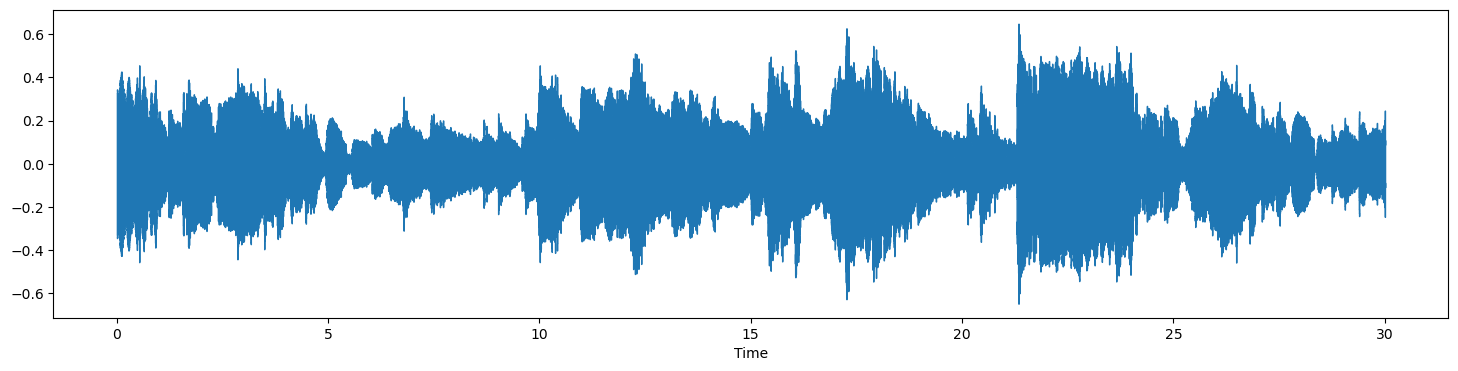

In [10]:
plt.rcParams['figure.figsize'] = (18,4)

path = "data/genres_original"

jazz, fs = librosa.load(path+"/jazz/jazz.00004.wav")
print(jazz, jazz.shape, fs)
librosa.display.waveshow(jazz, sr=fs)

mfccs = librosa.feature.mfcc(jazz, sr=fs)

In [3]:
print(mfccs.shape)

(20, 1293)


/Users/eliasmann/opt/anaconda3/envs/musicRec/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/Users/eliasmann/opt/anaconda3/envs/musicRec/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


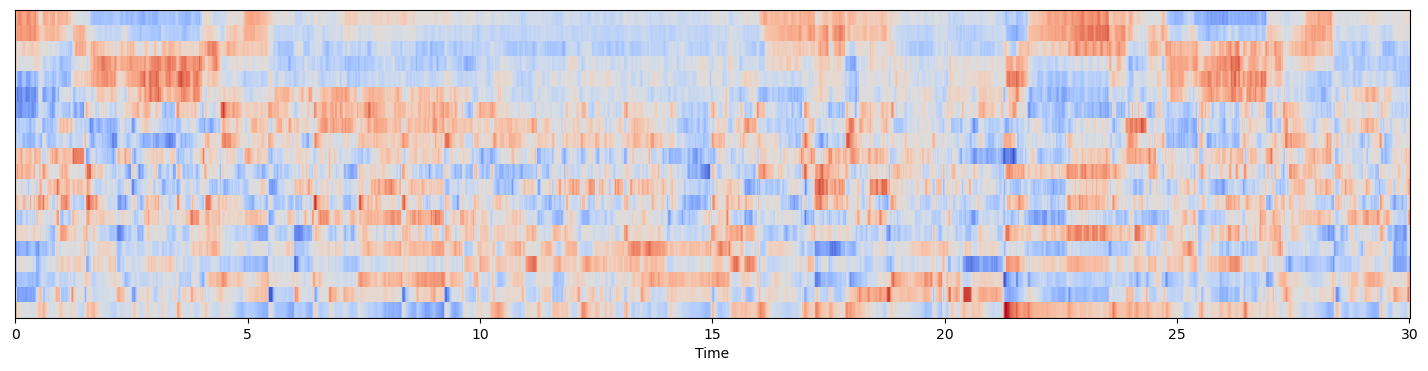

In [4]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [5]:
def to_decibles(signal):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal

# Function to plot the converted audio signal
def plot_spec(D, sr, genre):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + genre)
    fig.colorbar(spec)

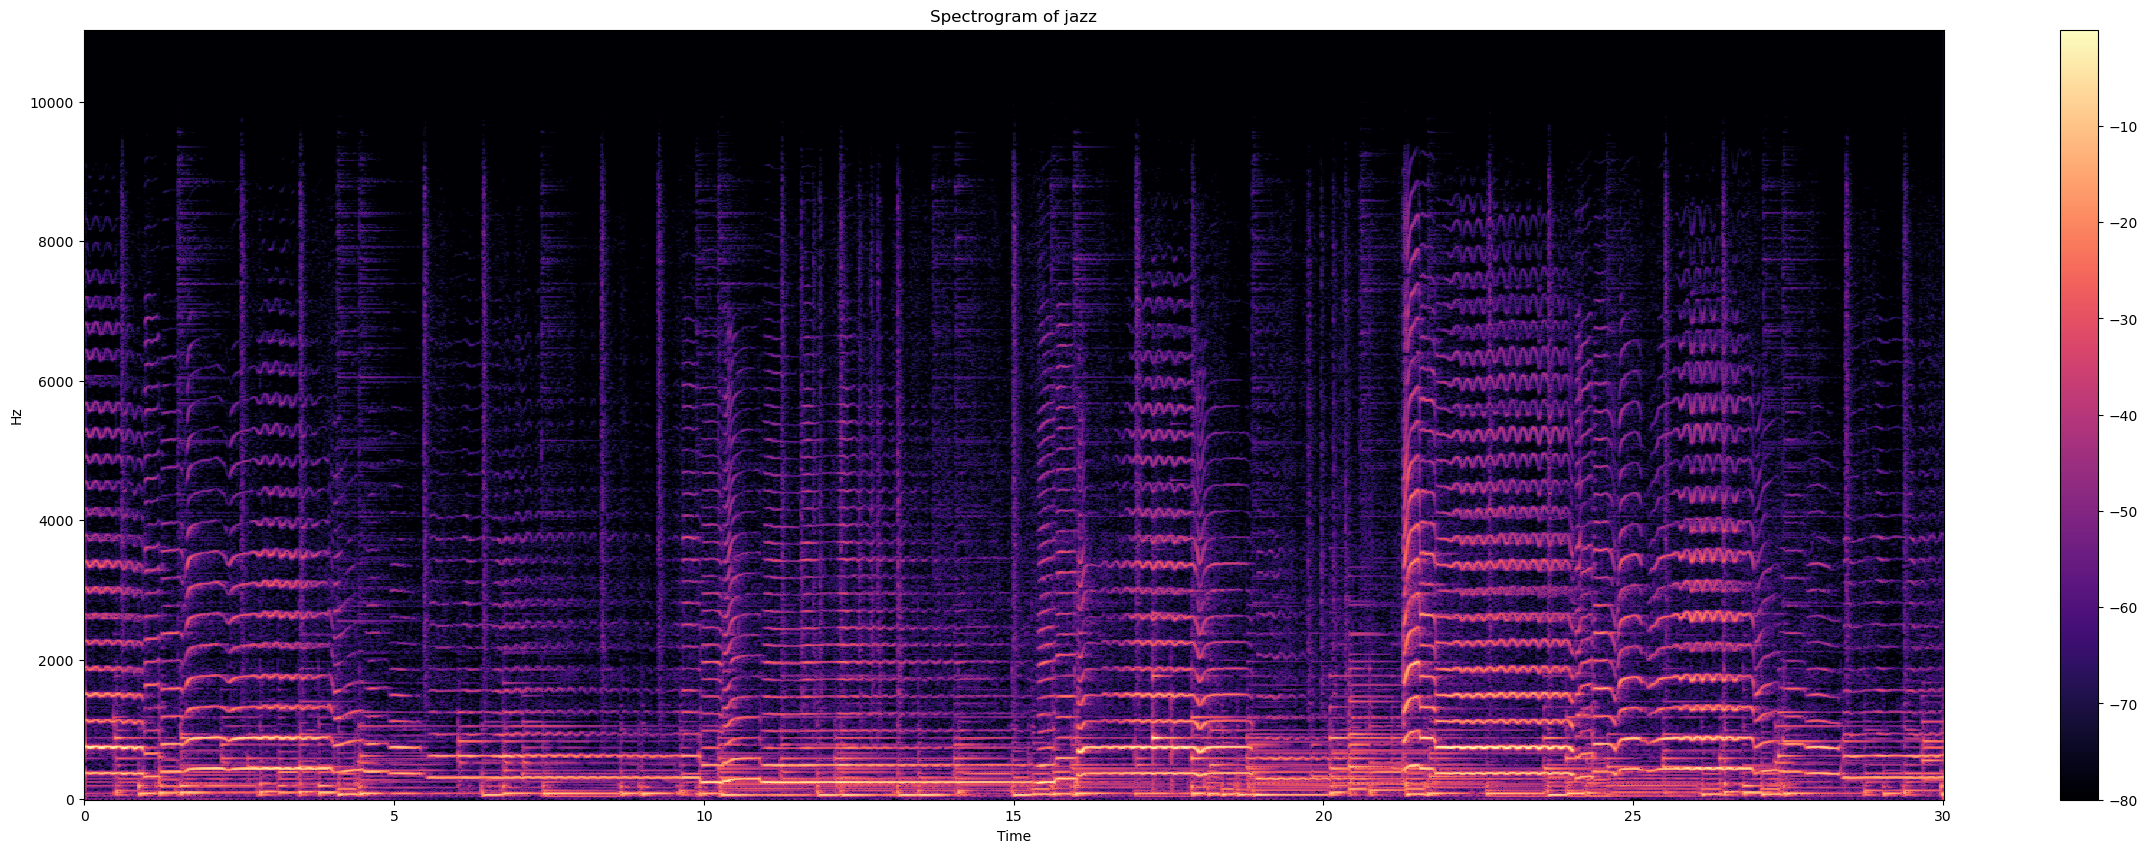

In [6]:
plot_spec(to_decibles(jazz), fs, "jazz")

In [7]:
jazz

array([0.12203979, 0.22442627, 0.19665527, ..., 0.0116272 , 0.03677368,
       0.05535889], dtype=float32)

In [8]:
jazz.shape

(661794,)

In [11]:
class song(object):
    def __init__(self, audio_ts):
        self.global_tempo = librosa.tempo(audio_ts)
        self.h_elements = librosa.harmonic(audio_ts)
        self.p_elements = librosa.percussive(audio_ts)


    
